In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Used to give labels to images based off the name of the folder they are in
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 
import os

%matplotlib inline

In [17]:
img = image.load_img("Train\Happy\IMG_0046.JPG")

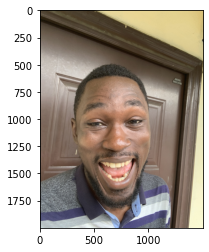

In [18]:
plt.imshow(img)

In [4]:
cv2.imread("Train\Happy\IMG_0042.JPG").shape

(2000, 1500, 3)

In [5]:
#ImageDataGenerator for training and validation.
# Has a couple of image augmentations that would help to prevent overfitting. e.g (zoom and flipping images)
train = ImageDataGenerator(rescale=1. /255,zoom_range=0.2, width_shift_range=0.1,height_shift_range=0.1)
validation = ImageDataGenerator(rescale=1. /255, validation_split=0.3)

In [7]:
# With the generators saved, next we use the generator to load our images from the base directory
# Specify image target size, and all images would be resized to the specified size
# Batch size specifies how many images you want to load at a single iteration
train_dataset =train.flow_from_directory('Train/',target_size=(200,200),
                                        batch_size=3,
                                        subset='training',
                                        class_mode='binary')

validation = validation.flow_from_directory('Validation_new/',target_size=(200,200),
                                        batch_size=3,
                                        subset='validation',
                                        class_mode='binary')

Found 50 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [8]:
#Checking the number of classes available in our training data
# And in this case we have 2 classes
train_dataset.class_indices


{'Happy': 0, 'Sad': 1}

In [9]:
# This shows the number of elements in each class
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [11]:
#Next we define our CNN model
# Using keras Sequential Model
#Also CNNs are defined using the Conv2D layer

model = Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),  #Applying the dropout layer to avoid overfitting
                                    #
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])


In [12]:
# Applying the EarlyStopping callback in the training process
# So the training stops if the model does not improve after a specified number of iterations
# In this case we are using 2

callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2, restore_best_weights=True)


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(lr=0.001),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, epochs=10,
                      validation_data = validation, callbacks=[callback])

Epoch 1/10
17/17 [==============================] - 21s 1s/step - loss: 0.9045 - accuracy: 0.5000 - val_loss: 0.6773 - val_accuracy: 0.8571
Epoch 2/10
17/17 [==============================] - 17s 1s/step - loss: 0.7046 - accuracy: 0.5600 - val_loss: 0.6766 - val_accuracy: 0.8571
Epoch 3/10
17/17 [==============================] - 17s 1s/step - loss: 0.6900 - accuracy: 0.6000 - val_loss: 0.6352 - val_accuracy: 0.5000
Epoch 4/10
17/17 [==============================] - 17s 1s/step - loss: 0.6445 - accuracy: 0.6200 - val_loss: 0.5667 - val_accuracy: 0.8571
Epoch 5/10
17/17 [==============================] - 17s 1s/step - loss: 0.6542 - accuracy: 0.6000 - val_loss: 0.5382 - val_accuracy: 0.9286
Epoch 6/10
17/17 [==============================] - 17s 1s/step - loss: 0.6130 - accuracy: 0.6400 - val_loss: 0.3798 - val_accuracy: 0.9286
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.6485 - accuracy: 0.7000 - val_loss: 0.3828 - val_accuracy: 0.9286
Epoch 8/10
17/17 [==

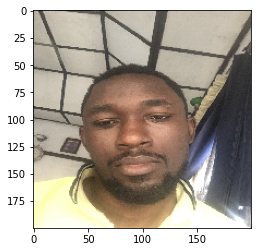

You look Happy 
 You must be having a Good day!


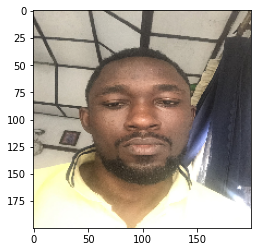

You look Happy 
 You must be having a Good day!


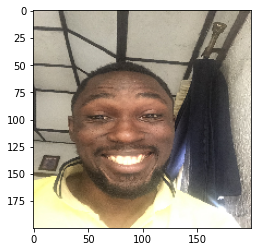

You look Happy 
 You must be having a Good day!


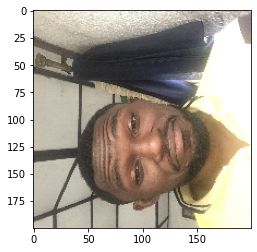

You look Happy 
 You must be having a Good day!


In [15]:
#Testing 
dir_path = "Tests/"

for i in os.listdir(dir_path):
    img=image.load_img(dir_path + '//' + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X =np.expand_dims(X,axis=0)
    images = np.vstack([X])
    
    classes = model.predict(images)
    if classes == 0:
        print("You look Happy \n You must be having a Good day!")
    else:
        print('You Do not Look Happy \n Is Everything Okay?')
    